In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
%matplotlib qt 

In [3]:
from itertools import product
import datetime
from matplotlib import colors
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.express as px


In [4]:
df = pd.read_csv("C:/Users/TIYANI/Videos/Final/Geometallurgy.csv", index_col='Hole_Id')

In [5]:
df.head()

,Depth_From,Depth_To,Bond Work Index,Abression Index,Rodmill Index,Drop Weight index,RQD,AxB,target
Hole_Id,,,,,,,,,
KRED207,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1
KRED207,10.0,14.0,10.3,0.32,13.7,21.0,45.00,0.67,1
KRED207,14.0,17.2,12.0,0.02,13.8,16.0,54.74,0.32,1
KRED207,17.2,27.0,12.0,0.02,13.8,16.0,54.74,0.32,1
KRED207,27.0,31.2,12.0,0.02,13.8,16.0,54.74,0.32,1


In [6]:
df.shape

(1122, 9)

In [7]:
df.isna().any()

Depth_From           False
Depth_To             False
Bond Work Index       True
Abression Index       True
Rodmill Index         True
Drop Weight index     True
RQD                   True
AxB                   True
target               False
dtype: bool

In [8]:
df.dropna(subset=['Abression Index'], how='all', inplace=True)

In [9]:
df.isna().any()

Depth_From           False
Depth_To             False
Bond Work Index      False
Abression Index      False
Rodmill Index        False
Drop Weight index    False
RQD                  False
AxB                  False
target               False
dtype: bool

In [10]:
df.head()

,Depth_From,Depth_To,Bond Work Index,Abression Index,Rodmill Index,Drop Weight index,RQD,AxB,target
Hole_Id,,,,,,,,,
KRED207,10.0,14.0,10.3,0.32,13.7,21.0,45.00,0.67,1
KRED207,14.0,17.2,12.0,0.02,13.8,16.0,54.74,0.32,1
KRED207,17.2,27.0,12.0,0.02,13.8,16.0,54.74,0.32,1
KRED207,27.0,31.2,12.0,0.02,13.8,16.0,54.74,0.32,1
KRED207,31.2,44.0,12.0,0.02,13.8,16.0,54.74,0.32,1


In [11]:
df.shape

(764, 9)

In [12]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

In [40]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [13]:
X = StandardScaler().fit_transform(df)
X

array([[-1.43342524, -1.51444654, -1.71943149, ..., -1.01563295,
        -1.02396991, -0.41011671],
       [-1.35125657, -1.44963181, -0.87008086, ..., -0.32886861,
        -1.04168015, -0.41011671],
       [-1.28552163, -1.25113669, -0.87008086, ..., -0.32886861,
        -1.04168015, -0.41011671],
       ...,
       [-0.61584695, -0.20802459,  0.27904059, ...,  0.74710918,
         1.02181581,  2.43833028],
       [-0.02628672, -0.14928624,  0.27904059, ...,  0.74710918,
         1.02181581,  2.43833028],
       [ 0.03328557,  0.06541256,  0.27904059, ...,  0.74710918,
         1.02181581,  2.43833028]])

In [14]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)
visualizer.show()
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [16]:
kmeans.cluster_centers_

array([[-0.39860451, -0.43739199, -0.96474532, -0.71750883, -0.36111953,
         1.0587212 , -0.52558321, -0.9520406 ,  0.03963807],
       [ 0.40248117,  0.42048215,  0.26199325,  0.75349425,  0.80765537,
        -0.36070563,  0.74729424,  0.97789043, -0.10359092],
       [-0.40554126, -0.3627243 ,  1.7870713 , -0.84276828, -2.08977174,
        -1.67659896, -1.37681521, -1.03310902,  0.28746214]])

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Domaining')
plt.xlabel('Depth_From')
plt.ylabel('Depth_To')
plt.legend()
plt.show()

In [28]:
Y = StandardScaler().fit_transform(df[['Rodmill Index', 'RQD']])
Y

array([[-0.3966799 , -1.01563295],
       [-0.37283353, -0.32886861],
       [-0.37283353, -0.32886861],
       ...,
       [ 0.84333103,  0.74710918],
       [ 0.84333103,  0.74710918],
       [ 0.84333103,  0.74710918]])

In [29]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Y)

In [30]:
kmeans.cluster_centers_

array([[-0.37147573, -0.54269613],
       [ 0.81531311,  0.74987065],
       [-2.7097772 , -3.06041381],
       [-1.54130537,  0.11252201]])

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('RI vs RQD')
plt.xlabel('Rodmill Index')
plt.ylabel('RQD')
plt.legend()
plt.show()

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('RI vs RQD')
plt.xlabel('Rodmill Index')
plt.ylabel('RQD')
plt.legend()
plt.show()

In [23]:
Y = StandardScaler().fit_transform(df[['Bond Work Index','Abression Index']])
Y

array([[-1.71943149, -0.2319613 ],
       [-0.87008086, -0.8548878 ],
       [-0.87008086, -0.8548878 ],
       ...,
       [ 0.27904059,  0.72319266],
       [ 0.27904059,  0.72319266],
       [ 0.27904059,  0.72319266]])

In [14]:
kmeans.cluster_centers_

array([[-0.40554126, -0.3627243 ,  1.7870713 , -0.84276828, -2.08977174,
        -1.67659896, -1.37681521, -1.03310902,  0.28746214],
       [-0.47653698, -0.44740551,  0.24891287,  0.77045995,  0.77143245,
        -0.37519864,  0.74604622,  0.92726678,  0.03361121],
       [ 1.3086796 ,  1.3113144 ,  0.2723612 ,  0.70406071,  0.83096153,
        -0.342628  ,  0.73643092,  1.00214378, -0.25779334],
       [-0.39338994, -0.4308397 , -0.98427926, -0.72281997, -0.37181154,
         1.08229522, -0.54017103, -0.96672247,  0.04766941]])

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Y)

In [25]:
kmeans.cluster_centers_

array([[-0.98245046, -0.72235151],
       [ 1.7870713 , -0.84276828],
       [ 0.26217037,  0.74174562]])

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Domaining')
plt.xlabel('Bond Work Index')
plt.ylabel('Abression Index')
plt.legend()
plt.show()

In [28]:
P = StandardScaler().fit_transform(df[['Rodmill Index','Drop Weight index']])
P

array([[-0.3966799 ,  2.30584456],
       [-0.37283353,  0.9402761 ],
       [-0.37283353,  0.9402761 ],
       ...,
       [ 0.84333103, -0.34335825],
       [ 0.84333103, -0.34335825],
       [ 0.84333103, -0.34335825]])

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(P)

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(P[y_kmeans == 0, 0], P[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(P[y_kmeans == 1, 0], P[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(P[y_kmeans == 2, 0], P[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(P[y_kmeans == 3, 0], P[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Domaining')
plt.xlabel('Bond Work Index')
plt.ylabel('Abression Index')
plt.legend()
plt.show()

In [31]:
T = StandardScaler().fit_transform(df[['RQD','AxB']])
T

array([[-1.01563295, -1.02396991],
       [-0.32886861, -1.04168015],
       [-0.32886861, -1.04168015],
       ...,
       [ 0.74710918,  1.02181581],
       [ 0.74710918,  1.02181581],
       [ 0.74710918,  1.02181581]])

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(T)

In [1]:
plt.figure(figsize=(12,8))
plt.scatter(T[y_kmeans == 0, 0], T[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(T[y_kmeans == 1, 0], T[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(T[y_kmeans == 2, 0], T[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(T[y_kmeans == 3, 0], T[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Domaining')
plt.xlabel('Bond Work Index')
plt.ylabel('Abression Index')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [17]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 9
Estimated number of noise points: 200


NameError: name 'labels_true' is not defined

In [33]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [34]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

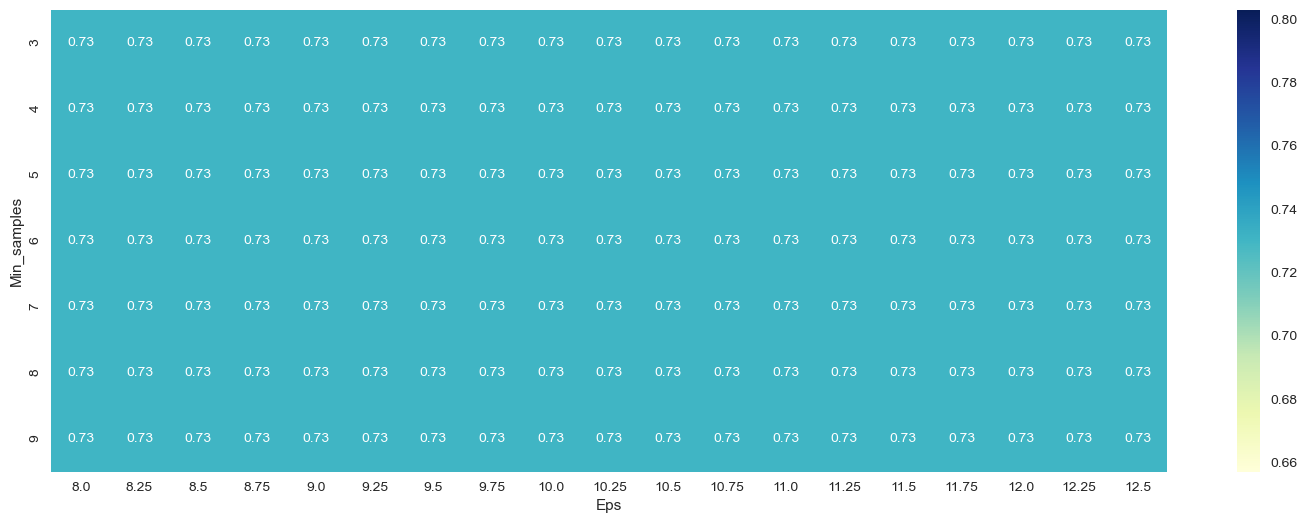

In [39]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

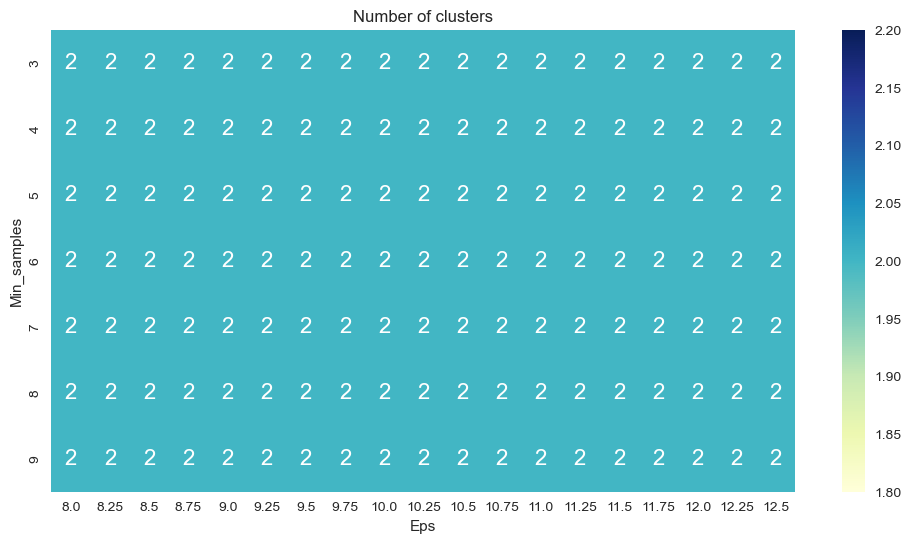

In [40]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

Estimated number of clusters: 16
Estimated number of noise points: 10


NameError: name 'labels_true' is not defined

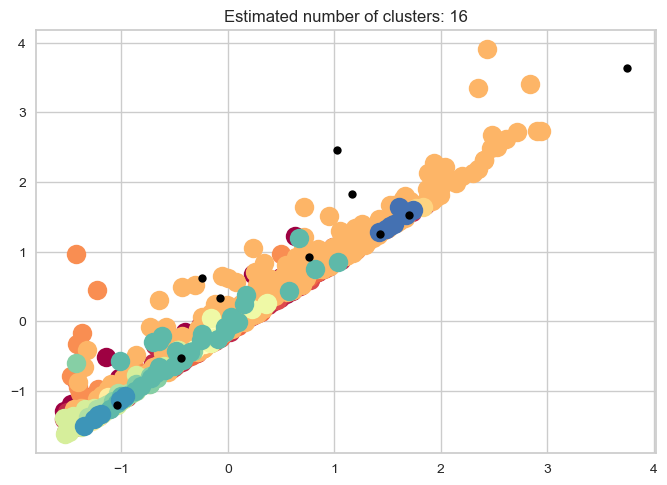

In [44]:
import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [45]:
from sklearn.decomposition import PCA

In [46]:
# We will now reduce the data to 3 features for clarity and clustering using PCA.
pca = PCA(n_components = 3)
pca.fit(X)
PCA_Dataset = pd.DataFrame(pca.transform(X), columns = (["col_1", "col_2", "col_3"]))
PCA_Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,764.0,2.455860e-16,1.929752,-3.964294,-1.685760,0.076414,1.744580,4.139699
col_2,764.0,-1.358715e-17,1.468952,-2.641668,-1.077642,-0.016534,0.310088,4.761694
col_3,764.0,4.063068e-16,1.241255,-3.194454,-0.876382,-0.123775,0.921060,5.623676


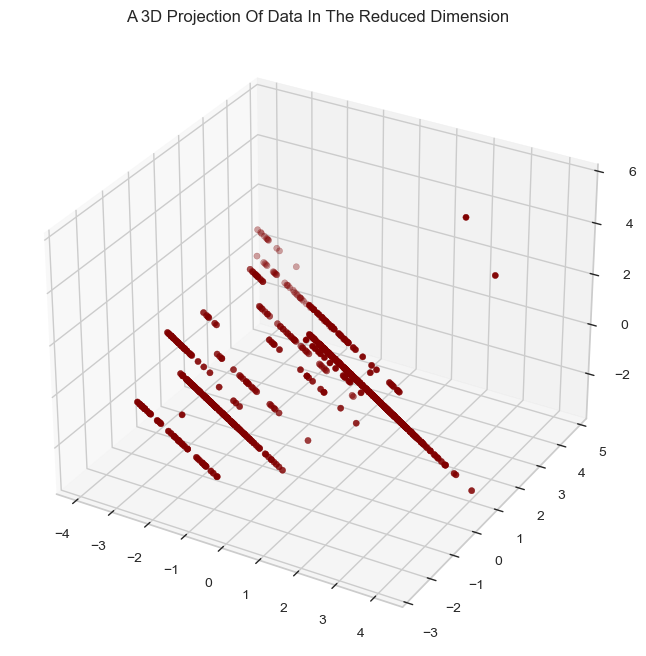

In [47]:
x =PCA_Dataset["col_1"]
y =PCA_Dataset["col_2"]
z =PCA_Dataset["col_3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()